# Example - Reproject Match (For Raster Calculations/Stacking)

`rio.reproject_match` will reproject to match the resolution, projection, and region of another raster.

This is useful for raster caclulations and stacking rasters.

In [1]:
import rioxarray # for the extension to load
import xarray

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def print_raster(raster):
    print(
        f"shape: {raster.rio.shape}\n"
        f"resolution: {raster.rio.resolution()}\n"
        f"bounds: {raster.rio.bounds()}\n"
        f"sum: {raster.sum().item()}\n"
        f"CRS: {raster.rio.crs}\n"
    )

## Load in xarray datasets

In [3]:
xds = xarray.open_dataarray("../../test/test_data/input/MODIS_ARRAY.nc")
xds_match = xarray.open_dataarray("../../test/test_data/input/MODIS_ARRAY_MATCH.nc")

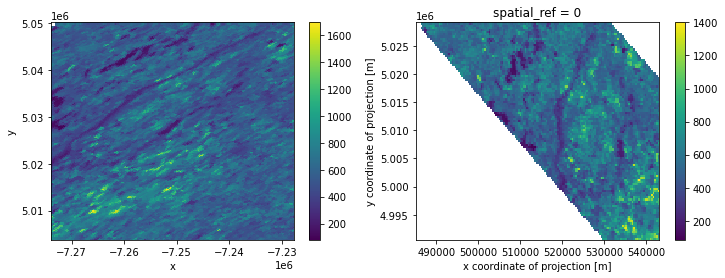

In [4]:
fig, axes = plt.subplots(ncols=2, figsize=(12,4))
xds.plot(ax=axes[0])
xds_match.plot(ax=axes[1]) 
plt.draw()

In [5]:
print("Original Raster:\n----------------\n")
print_raster(xds)
print("Raster to Match:\n----------------\n")
print_raster(xds_match)

Original Raster:
----------------

shape: (200, 200)
resolution: (231.6563582639561, -231.65635826375018)
bounds: (-7274009.649486291, 5003777.3385, -7227678.3778335, 5050108.61015275)
sum: 23209796.0
CRS: PROJCS["unknown",GEOGCS["unknown",DATUM["unknown",SPHEROID["unknown",6371007.181,0]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]

Raster to Match:
----------------

shape: (100, 150)
resolution: (386.65122672362685, -386.65122672362685)
bounds: (485124.8828918401, 4990535.635952473, 543122.5669003841, 5029200.758624835)
sum: 4903477.0
CRS: EPSG:32615



## Reproject Match

API Reference:

- DataArray: [rio.reproject_match()](../rioxarray.rst#rioxarray.raster_array.RasterArray.reproject_match)
- Dataset: [rio.reproject_match()](../rioxarray.rst#rioxarray.raster_dataset.RasterDataset.reproject_match)

In [6]:
xds_repr_match = xds.rio.reproject_match(xds_match)

In [7]:
print("Reprojected Raster:\n-------------------\n")
print_raster(xds_repr_match)
print("Raster to Match:\n----------------\n")
print_raster(xds_match)

Reprojected Raster:
-------------------

shape: (100, 150)
resolution: (386.6512267236268, -386.6512267236231)
bounds: (485124.8828918401, 4990535.635952473, 543122.5669003841, 5029200.758624835)
sum: 4930593.0
CRS: EPSG:32615

Raster to Match:
----------------

shape: (100, 150)
resolution: (386.65122672362685, -386.65122672362685)
bounds: (485124.8828918401, 4990535.635952473, 543122.5669003841, 5029200.758624835)
sum: 4903477.0
CRS: EPSG:32615



## Raster Calculations

Now that the rasters have the same projection, resolution, and extents,
you can do raster calculations.

It is recommended to use ``assign_coords`` to make the coordinates the exact same
due to tiny differences in the coordinate values due to floating precision ([issue 298](https://github.com/corteva/rioxarray/issues/298)).

In [8]:
xds_repr_match = xds_repr_match.assign_coords({
    "x": xds_match.x,
    "y": xds_match.y,
})
xds_sum = xds_repr_match + xds_match

In [9]:
print("Sum Raster:\n-----------\n")
print_raster(xds_sum)

Sum Raster:
-----------

shape: (100, 150)
resolution: (386.6512267236268, -386.6512267236231)
bounds: (485124.8828918401, 4990535.635952473, 543122.5669003841, 5029200.758624835)
sum: 9814687.0
CRS: EPSG:32615



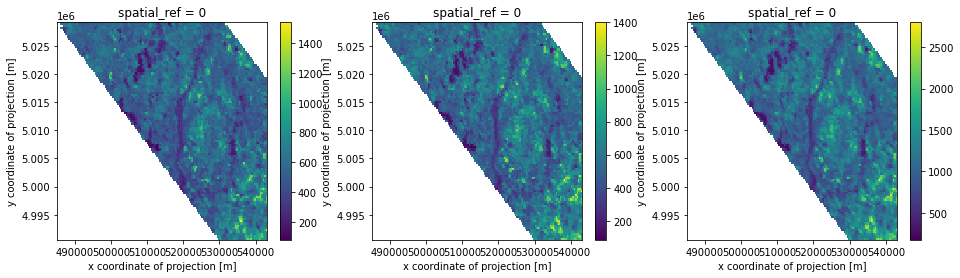

In [10]:
fig, axes = plt.subplots(ncols=3, figsize=(16,4))

xds_repr_match.plot(ax=axes[0])
xds_match.plot(ax=axes[1]) 
xds_sum.plot(ax=axes[2]) 

plt.draw()